<center>
<img src="logo.png" height="900"> 
</center>


# Линейная регрессия 

Данные для этой домашки взяты из [книги по эконометрике Филиппа Картаева](https://www.econ.msu.ru/departments/mmae/Category.20190227154534_1269/Category.20190227155254_6724/)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats 

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Задание 1 (тренинг)

Руководство крупной торговой сети планирует выяснить, помогает ли тренинг по продажам увеличить эффективность работы менеджеров по продажам. 

Для решения этой задачи были собраны данные: 

- `sales` - объём продаж данного менеджера (в тысячах рублей за период)
- `training` - дамми-переменная, равная единице, если в а самом начале данного периода менеджер прошел тренинг по продажам (работники, которые направлялись на курсы, выбирались из общей совокупности работников компании при помощи специальной лотереи)
- `female` - дамми-переменная, равная единице для менеджеров женщин и нулю для мужчин
- `experience` - опыт работы менеджера в годах 
- `capital` -  дамми-переменная, равная единице, если менеджер работает в столичном отделении компании, и равная нулю в противном случае
- `IQ` - все менеджеры при приеме на работу проходят IQ-тест 

In [3]:
df = pd.read_csv('data/training.tsv', sep='\t')
print(df.shape)
df.head()

(2000, 6)


,sales,training,female,experience,capital,IQ
0,145.554,0,0,2,0,101
1,100.768,0,0,2,0,83
2,107.222,0,0,1,0,85
3,143.026,0,1,1,1,101
4,176.246,0,0,1,0,98


Предполагается, что в данных есть гетероскедастичность. Все гипотезы проверяйте с учётом коррекции `HC3`.

> Гетероскедастичность довольно часто присутствует в данных. Из-за этого, на практике, обычно, сразу вводят коррекцию на неё, и тестируют все гипотезы с помощью асимптотического подхода.

__[а]__ Оцените регрессию переменной `sales` на переменные `training`, `female`, `experience`, `capital`, `IQ`. Значимо ли уравнение в целом на уровне значимости 5%? Сколько переменных значимы на уровне значимости $5\%$? 

In [ ]:
import statsmodels.formula.api as smf

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

model_a = smf.ols(formula='sales ~ training + female + experience + capital + IQ', data=df).fit(cov_type='HC3')

- Запишите в переменную `prob_f` $p$-value для гипотезы о незначимости регрессии. 
- В переменную `cnt` запишите число незначимых коэффициентов. 
- На сколько в среднем, при прочих равных условиях, прохождение тренинга увеличивыет объём продаж менеджера? Запишите ответ в переменную `tren`.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

prob_f = ...
cnt = ...
tren = ...

# your code here

prob_f = model_a.f_pvalue
cnt = sum(model_a.pvalues[1:] >= 0.05)
tren = model_a.params['training']

print(model_a.pvalues[1:] >= 0.05)

print(f"P-value уравнения: {prob_f:.2e}")
print(f"Незначимых переменных: {cnt}")
print(f"Эффект тренинга: {tren:.2f}")

training      False
female         True
experience    False
capital       False
IQ            False
dtype: bool
P-value уравнения: 2.27e-158
Незначимых переменных: 1
Эффект тренинга: 18.87


In [7]:
assert np.abs(prob_f - 7.03e-159) < 1e-4

# несколько похожих скрытых тестов

Уравнение значимо на уровне 5% (p ≈ 7.03e-159). Все переменные значимы, кроме одной: female

__[б]__ Оцените модель заново, исключив из неё переменную `capital` и добавив переменную `training:capital` (произведение столбцов). Значим ли коэффициент перед этой переменной на уровне значимости $5\%$? 

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

model_b = smf.ols(formula='sales ~ training + female + experience + IQ + training:capital', data=df).fit(cov_type='HC3')

p_interaction = model_b.pvalues['training:capital']
is_significant = p_interaction < 0.05

print("Значим ли коэффициент перед переменной 'training:capital':", is_significant)

Значим ли коэффициент перед переменной 'training:capital': True


- На сколько в среднем,  при прочих равных условиях, увеличивыет объём продаж столичного менеджера? Запишите ответ в переменную `ans1`.
- На сколько в среднем,  при прочих равных условиях, увеличивыет объём продаж менеджера не из столицы? Запишите ответ в переменную `ans2`.

In [13]:
ans1 = ...
ans2 = ...

# your code here

ans1 = model_b.params['training'] + model_b.params['training:capital']  # capital=1
ans2 = model_b.params['training']

In [14]:
assert np.abs(ans2 - 15.7) < 1e-1

# несколько похожих скрытых тестов

__[в]__ Для модели, оценённой в пункте б) проведите тест Бреуша-Пагана на гетероскедастичность. Действительно ли она наблюдается ли она в остатках? 

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

from statsmodels.stats.diagnostic import het_breuschpagan

# Остатки и их квадраты
residuals = model_b.resid
_, p_bp, _, _ = het_breuschpagan(residuals, model_b.model.exog)

print(f"P-value теста Бреуша-Пагана: {p_bp}")
if p_bp < 0.05:
    print("Гетероскедастичность присутствует")
else:
    print("Гетероскедастичность отсутствует")

P-value теста Бреуша-Пагана: 1.5246013076682586e-10
Гетероскедастичность присутствует


## Задание 2 (размер класса) 

Давайте попробуем проанализировать данные о том, как размер класса влияет на успеваемость учеников. Коррекцию HC3 в этом задании мы использовать не будем. 

__Описание переменных:__

- `CLASS` - размер класса, в котором обучается школьник, воздействие именно этой переменной нас интересует 
- `EXPN` - средние расходы на одного школьника в школе, где он учится, измеренные в тысячах долларов в год
- `INCOME` - средний доход на одного члена семьи в семие школьника, измеренный в тысячах долларов в год 
- `TEST` - результат итогового стандартизированного теста, который писали все школьники в конце учебного года, она характеризует качество обучения 

In [17]:
df = pd.read_csv('data/study.tsv', sep='\t')
print(df.shape)
df.head()

(200, 4)


,CLASS,EXPN,INCOME,TEST
0,23,3,10,15
1,28,3,46,44
2,12,5,39,76
3,18,2,22,7
4,30,5,20,30


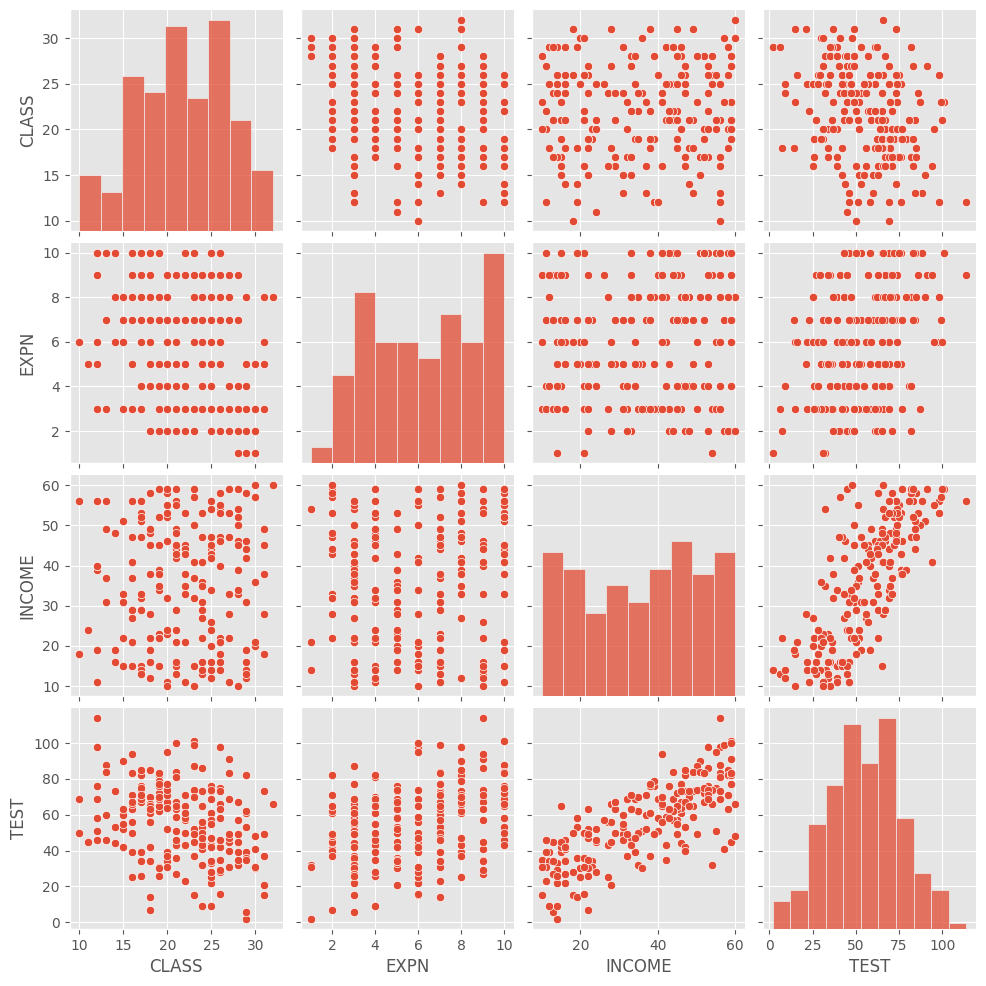

In [18]:
sns.pairplot(df);

__[a]__ Оцените параметры модели 

$$
TEST_i = \beta_0 + \beta_1 \cdot CLASS_i + \varepsilon_i
$$

Коррекцию на гетероскедастичность вводить не надо. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

model_2a = smf.ols(formula='TEST ~ CLASS', data=df).fit()


P-value CLASS: 0.0000
Коэффициент CLASS: -1.31


Значима ли переменная `CLASS`? В качестве ответ на вопрос вбейте получившееся значение $p$-value и получившееся значение коэффициента.

In [23]:
prob = ...
beta = ...

# your code here

prob = model_2a.pvalues['CLASS']
beta = model_2a.params['CLASS']

print(f"P-value CLASS: {prob}")
print(f"Коэффициент CLASS: {beta:.2f}")

P-value CLASS: 5.818787814054087e-06
Коэффициент CLASS: -1.31


In [21]:
assert prob < 1e-10

# несколько похожих скрытых тестов

AssertionError: 

В получившемся уравнении коэффициент $\beta_1$ можно проинтерпретировать так, что  каждый дополнительным человек в классе приводит к тому, что результат типичного школьника из этого класса снижается в среднем на $beta_1$ балла.

> Мы можем так интерпретировать значение коэффициента, если выполняются предпослыки линейной регрессии. Например, первая предпослыка говорит о том, что мы должны были верно специфицировать модель. А что, если это не так и мы пропустили какую-нибудь переменную?

__[б]__ Оцените уравнение 

$$
TEST_i = \beta_0 + \beta_1 \cdot CLASS_i + \beta_2 \cdot EXPN_i + \varepsilon_i
$$

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

model_2b = smf.ols(formula='TEST ~ CLASS + EXPN', data=df).fit()


F-статистика: 21.91


- Значимо ли уравнение в целом?  Запишите получившееся значение $F$-статистики для проверки этой гипотезы в переменную `f_stat`

In [25]:
f_stat = ...

# your code here

f_stat = model_2b.fvalue

print(f"F-статистика: {f_stat:.2f}")

F-статистика: 21.91


In [ ]:
assert f_stat > 8

# несколько похожих скрытых тестов  

Коэффициент перед переменной `CLASS` значимый, но он увеличился. По всей видимости, переменная `EXPN`, которую мы добавили, значимо влияет на результаты школьника. Кроме того, она коррелирует с `CLASS`. Когда мы не включаем её в модель, влияние этой переменной остаётся в случайной ошибке. Из-за этого возникает ковариация $Cov(CLASS_i, \varepsilon_i)$. 

Такая проблема называется __эндогенностью.__ Она приводит к смещению и несостоятельности оценок коэффициентов. Когда мы добавили в модель переменную `EXPN`, мы устранили возникшее у нас смещение. 

__[в]__ А что, если у нас есть какие-то другие переменные, которые оказались в ошибке, но при этом коррелируют с `CLASS`? Оцените уравнение:

$$
TEST_i = \beta_0 + \beta_1 \cdot CLASS_i + \beta_2 \cdot EXPN_i + \beta_3 \cdot INCOME + \varepsilon_i
$$

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

model_2c = smf.ols(formula='TEST ~ CLASS + EXPN + INCOME', data=df).fit()
print(model_2c.summary())

                            OLS Regression Results                            
Dep. Variable:                   TEST   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.84e-55
Time:                        20:12:02   Log-Likelihood:                -764.75
No. Observations:                 200   AIC:                             1537.
Df Residuals:                     196   BIC:                             1551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1786      4.847      6.020      0.0

Обратите внимание, что значение перед переменной `CLASS` снова изменилось.

Изначально нас волновал вопрос: __Влияет ли размер класса на успеваемость?__ По факту, нас интересует только коэффициент перед этой переменной. Чтобы получить для него хорошую оценку, нам нужно учитывать в нашей регрессии все существенные факторы (т.е. все коррелированные с интересущей нас переменной факторы, коэффициенты при которых в истинной модели регрессии отличны от нуля). Такие дополнительные переменные обычно называют __контрольными__. 

Иногда бывает так, что интересующая нас переменная связана с чем-то ненаблюдаемым. Например, в данной ситуации успешность людей может быть связана с их талантом. Если мы никак не учтем талант людей в модели, мы получим неверные выводы. В эконометрике существуют различные продвинутые методы, которые позволяют попытаться оценить модели, учитывающие такие факторы. 

В качестве учебника можно почитать, например, книгу "Введение в эконометрику" Филиппа Картаева. 